In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype("float32") / 255
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype("float32") / 255


model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=64)


Epoch 1/100
750/750 [==============================] - 6s 6ms/step - loss: 0.5869 - accuracy: 0.7860 - val_loss: 0.3855 - val_accuracy: 0.8604
Epoch 2/100
750/750 [==============================] - 6s 8ms/step - loss: 0.3863 - accuracy: 0.8593 - val_loss: 0.3218 - val_accuracy: 0.8814
Epoch 3/100
750/750 [==============================] - 5s 7ms/step - loss: 0.3381 - accuracy: 0.8767 - val_loss: 0.2994 - val_accuracy: 0.8895
Epoch 4/100
750/750 [==============================] - 5s 7ms/step - loss: 0.3044 - accuracy: 0.8887 - val_loss: 0.2756 - val_accuracy: 0.8976
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2813 - accuracy: 0.8962 - val_loss: 0.2679 - val_accuracy: 0.8984
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2652 - accuracy: 0.9017 - val_loss: 0.2583 - val_accuracy: 0.9051
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2454 - accuracy: 0.9104 - val_loss: 0.2517 - val_accuracy: 0.9078

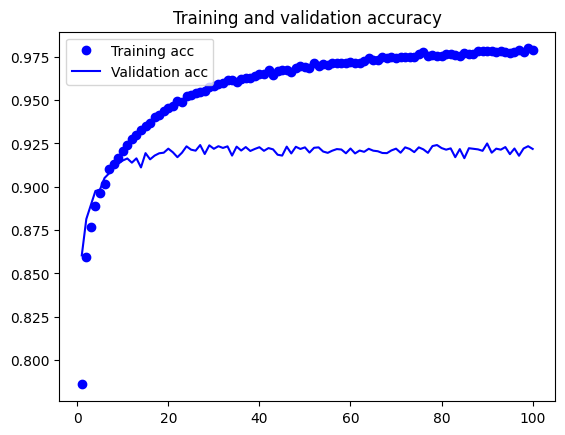

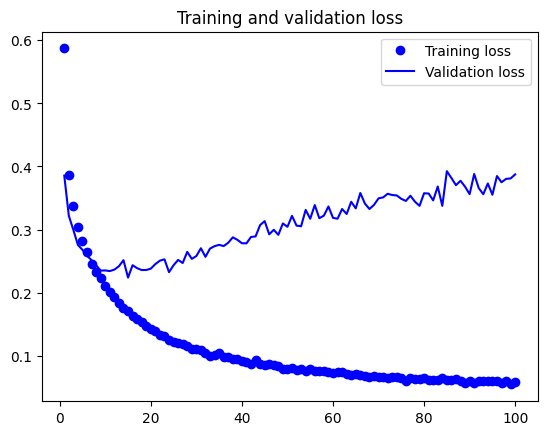

In [11]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [ ]:
З отриманих результатів можна зробити висновок, що точність отриманої згорткової мережі є кращою за точністю багатошарової мережі з попереднього завдання.
Хоча параметр точності на тренувальних даних майже не відрізняється, але на тестових даних він є значно вищим -92%, що є показником гарної роботи